<a href="https://colab.research.google.com/github/chanatiganeshpreetham/Machine_Learning_Zomato_Review_Analysis/blob/main/Zomato_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMporting Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import datset

In [5]:
dataset1=pd.read_csv('zomatot.tsv', delimiter='\t',quoting=3)


In [6]:
dataset=pd.read_csv('zomato.csv')

In [7]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


cleaning dataset

In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
dataset["Review"]

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [10]:
def preprocess(phrase):
  zomato_ratings=re.sub('[^a-zA-Z]',' ', phrase)
  zomato_ratings=zomato_ratings.lower()
  zomato_ratings=zomato_ratings.split()
  ps=PorterStemmer()
  all_stopwords=stopwords.words('english')
  all_stopwords.remove('not')
  zomato_ratings=[ps.stem(word)for word in zomato_ratings if not word in set(all_stopwords) ]
  zomato_ratings=' '.join(zomato_ratings)
  return zomato_ratings


corpus=[]
for i in range(0,1000):
  corpus.append(preprocess( dataset["Review"][i]))



In [11]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1600)
print(cv.fit_transform([preprocess("I best"), preprocess("kill the best do"), preprocess("do is my frend")]).toarray())

[[1 0 0]
 [1 0 1]
 [0 1 0]]


Bag of words creation

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1600)
X=cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

def happyDog(phrase):
  l = len(corpus)
  narr = corpus[:]
  narr.append(preprocess(phrase))
  return [cv.fit_transform(narr).toarray()[l]]



split data into test and train

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

Training Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

Testing vs Prediction

1
1


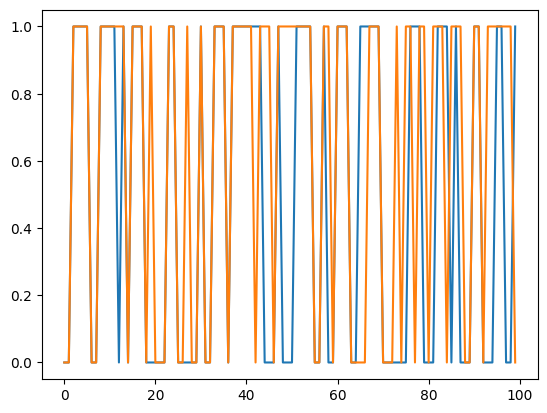

In [16]:
y_pred=classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1),1)))
#for i in range(len(y_pred)):
#  print(y_pred[i], end=" ")
#  print(y_test[i], end="\n")
import matplotlib.pyplot as plt
plt.plot(y_test[0:100])
plt.plot(y_pred[0:100])

pred = classifier.predict(happyDog("I am full"))
pred2 = classifier.predict(happyDog("I like the food"))

print(pred[0])
print(pred2[0])
